In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import inline as inline
import squarify 

%matplotlib inline


pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv')

/home/cviere/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df_model = df[df.model.notnull()][['person', 'model']]
model_persons = df_model['person']                #  SERIE CON PERSONAS QEUE ESTA
df_model_users = df.loc[df['person'].isin(model_persons), :]
df_model_users_buys = df_model_users.loc[df['event'] == 'conversion']
models_counts = df_model_users_buys['model'].value_counts().head(8)

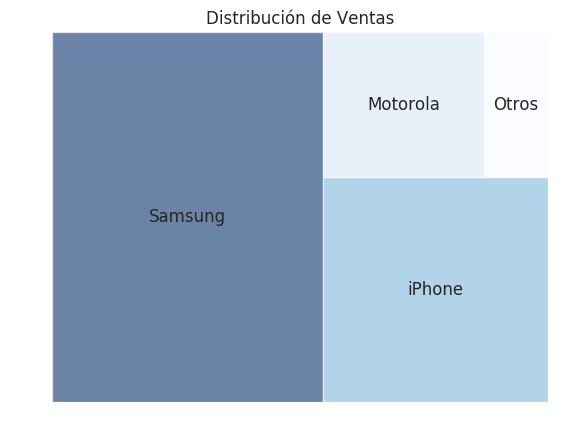

In [27]:
sales_Samsung = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Samsung')].value_counts())
sales_iPhone = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('iPhone')].value_counts())
sales_Motorola = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Motorola')].value_counts())
sales_LG = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('LG')].value_counts())
sales_Sony = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Sony')].value_counts())
sales_Asus = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Asus')].value_counts())
sales_Lenovo = sum(df_model_users_buys['model'].loc[df_model_users_buys['model'].str.contains('Lenovo')].value_counts())

df_brand_sales = pd.DataFrame({'brand': ['Samsung', 'iPhone', 'Motorola', 'Otros'],
                   'sales': [sales_Samsung, sales_iPhone, sales_Motorola, sales_LG + sales_Sony + sales_Asus + sales_Lenovo]})
df_brand_sales.sort_values('sales', ascending=False)


fig = plt.gcf()
ax = fig.add_subplot()


norm = matplotlib.colors.Normalize(vmin=min(df_brand_sales.sales), vmax=max(df_brand_sales.sales))
colors = [matplotlib.cm.Blues(norm(value)) for value in df_brand_sales.sales]

squarify.plot(sizes=df_brand_sales['sales'], label=df_brand_sales['brand'], color = colors, alpha=.6 )
plt.title("Distribución de Ventas")
plt.axis('off')
plt.show() 